# Genetic Algorithm
A genetic algorithm is an optimization technique used to find the maximum or minimum of a function within a specified domain. 
In this section, we will first create a program that implements a genetic algorithm from scratch. 
Then, we will use the *geneticalgorithm* library to find the maximum or minimum of a function in a given domain.

## Genetic Algorithm from Scratch

### Optimization Problem
The following question is from OpenStax Calculus-III, Example 4.40. 
Find the maximum value of the fiven function within the specified domain.
$ f(x,y) = x^2-2xy+4y^2-4x-2y+24, \,\,\, 0\le x \le 4, \,\,\, 0\le y \le 2$.

### Initial Population
The population is a set of randomly chosen pairs of possible $(x,y)$ values within the given domain. 
- This population will be updated throughout the genetic algorithm process.

**Coding**
The following code generates an initial population of size $N=100$ containing 100 pairs of $(x,y)$ values. 
In each pair, $x$ is randomly selected between 0 and 4, and $y$ is randomly selected between 0 and 2.

In [7]:
import numpy as np

In [8]:
population_size = 100

In [9]:
def population(pop_size = population_size):
    init_pop = []
    for i in range(pop_size):
        init_pop.append((np.random.uniform(0,4), np.random.uniform(0,2)))
    return init_pop

In [10]:
np.random.seed(0)
initial_population = population(population_size)
initial_population[:5]

[(2.195254015709299, 1.430378732744839),
 (2.4110535042865755, 1.0897663659937937),
 (1.6946191973556188, 1.2917882261333122),
 (1.75034884505077, 1.7835460015641595),
 (3.854651042004117, 0.7668830376515554)]

### Fitness Function
The fitness function is the function that we aim to maximize.
- In this question, the function $f(x,y)$ is the fitness function.

In [12]:
def f(x,y):
    return x**2-2*x*y+4*y**2-4*x-2*y+24

In [13]:
f_values = [f(x,y) for (x,y) in initial_population]
f_values[:5]

[19.081210627429286,
 17.484825150038,
 19.806370013216757,
 22.97572368695568,
 18.346269785696855]

### Parent Selection
Using randomness and fitness function values, parents will be selected from the current population. 
- Selected parents will then be used to generate new child pairs in the next step.
- There are various methods for choosing parents, but the main principle is to select pairs with higher fitness function values with a greater probability.
- Pairs with lower fitness values still have a chance to be chosen, but this probability will be smaller.

In this setion, we will use the tournament method for parent selection. 
- In this method, a specified number of $(x, y)$ pairs are selected randomly, and the pair with the highest fitness function value among them will be chosen as a parent.

In [16]:
def select_parent(pop_data, f_val, random_size=20):
    random_ind =  np.random.randint(0, len(pop_data)-1, random_size) 
    f_v = [f_val[i] for i in random_ind]
    max_f_v_index = np.argmax(f_v)
    return pop_data[random_ind[max_f_v_index]]

In [17]:
parents = [select_parent(initial_population, f_values, random_size=5) for i in range(population_size)]
parents[:5]

[(1.7434597010625072, 1.7838467100313442),
 (0.25658998539513744, 1.3849442387400397),
 (0.40090754924920446, 1.838965227489347),
 (0.40090754924920446, 1.838965227489347),
 (0.0767727932373341, 0.6031496333490987)]

In [18]:
len(parents)

100

### Crossover
In this step, one new child pair will be produced from two parent pairs. 
- The coordinates of the child will be generated using the mean values of the $x$ and $y$ coordinates of the parent pairs. 
- To introduce more randomness, we will also include a probability condition that allows one of the parents to be retained as the child.

In [20]:
def crossover(parent1, parent2, prob_crossover=0.1):
    prob = np.random.uniform(0,1)
    if prob < prob_crossover:
        return [parent1, parent2][np.random.randint(0,2)]
    else:
        return [(parent1[0]+parent2[0])/2, (parent1[1]+parent2[1])/2]

### Mutation
Mutation is used to slightly change the child coordinates, like in nature.
- We will add a percentage defined by *pct_mutation* to each coordinate, resulting in a small change to the coordinates.
- A probability condition will be included to determine whether mutation will be applied.

In [22]:
def mutuation(child, prob_mutuation=0.3, pct_mutuation=0.1):
    prob = np.random.uniform(0,1)
    c=np.random.choice([-1,1])
    if prob < prob_mutuation:
        return [min(child[0]*(1+c*pct_mutuation),4), min(child[1]*(1+c*pct_mutuation),2)] 
    else:
        return child

### Next Generation
The next (second) generation will be created from the initial population by performing crossover among consecutive pairs of parents.
- Mutation will also be applied after producing the child pairs.

In [24]:
def next_generation(parent_list):
    children_list = []
    for i in range(len(parent_list)):
        if i != len(parent_list)-1:
            child = crossover(parent_list[i], parent_list[i+1], prob_crossover=0.1)
        else:
            child = crossover(parent_list[i], parent_list[0], prob_crossover=0.1)

        children_list.append(mutuation(child))
    return children_list

In [25]:
next_generation(parents)[:5]

[[1.0000248432288223, 1.5843954743856918],
 [0.36081679432428404, 1.6550687047404125],
 [0.44099830417412494, 2],
 [0.23884017124326928, 1.221057430419223],
 [0.07094087234938665, 1.0207751960002387]]

### Iteration
In this part, we will generate generations iteratively to enhance them, with the goal of finding the $(x, y)$ pair that has the highest fitness function value.

We will follow the steps outlined above:

1. **Initialize Population**: Generate an initial population of \((x, y)\) pairs within the specified domain.
2. **Parent Selection**: Select parent pairs using the tournament method based on fitness values.
3. **Crossover**: Generate child pairs from the parents by averaging their coordinates, with a probability condition to retain one parent as a child.
4. **Mutation**: Slightly alter child coordinates by a set percentage, with a probability condition for mutation.
5. **Iteration**: Repeat these steps iteratively to produce new generations, improving toward the \((x, y)\) pair with the highest fitness function value. 

Each iteration will bring the population closer to an optimal solution based on the fitness function.

In [28]:
population_size = 1000

initial_population = population(population_size)
f_values = [f(x,y) for (x,y) in initial_population]
parents = [select_parent(initial_population, f_values, random_size=5) for i in range(population_size)]

max_ind = np.argmax(f_values)
print(f'Iteration: {0:<3} --- x:{parents[max_ind][0]:.2f}, y:{parents[max_ind][1]:.2f}, f(x,y): {f_values[max_ind]:.2f}')

for i in range(1,101):
    
    parents = [select_parent(parents, f_values, random_size=100) for i in range(population_size)]
    parents = next_generation(parents)

    if i%5 == 0:
        f_values = [f(x,y) for (x,y) in parents]
        max_ind = np.argmax(f_values)
        print(f'Iteration: {i:<3} --- x:{parents[max_ind][0]:.2f}, y:{parents[max_ind][1]:.2f}, f(x,y): {f_values[max_ind]:.2f}')

Iteration: 0   --- x:1.28, y:1.89, f(x,y): 34.56
Iteration: 5   --- x:1.35, y:1.59, f(x,y): 23.02
Iteration: 10  --- x:1.81, y:1.98, f(x,y): 24.54
Iteration: 15  --- x:1.86, y:2.00, f(x,y): 24.54
Iteration: 20  --- x:1.91, y:2.00, f(x,y): 24.37
Iteration: 25  --- x:1.89, y:1.99, f(x,y): 24.35
Iteration: 30  --- x:1.91, y:1.99, f(x,y): 24.27
Iteration: 35  --- x:1.99, y:2.00, f(x,y): 24.05
Iteration: 40  --- x:2.00, y:2.00, f(x,y): 24.00
Iteration: 45  --- x:2.03, y:2.00, f(x,y): 23.88
Iteration: 50  --- x:2.03, y:1.99, f(x,y): 23.78
Iteration: 55  --- x:2.04, y:1.99, f(x,y): 23.76
Iteration: 60  --- x:2.14, y:2.00, f(x,y): 23.39
Iteration: 65  --- x:2.19, y:1.99, f(x,y): 23.17
Iteration: 70  --- x:2.19, y:1.99, f(x,y): 23.17
Iteration: 75  --- x:2.22, y:1.99, f(x,y): 23.12
Iteration: 80  --- x:2.21, y:1.98, f(x,y): 23.04
Iteration: 85  --- x:2.26, y:1.99, f(x,y): 22.97
Iteration: 90  --- x:2.36, y:2.00, f(x,y): 22.68
Iteration: 95  --- x:2.46, y:2.00, f(x,y): 22.37
Iteration: 100 --- x

## geneticalgorithm Library
The geneticalgorithm library is a useful tool for finding the minimum value of a function. 
- You can install it in a Jupyter Notebook using the following command: 
```python
!pip install geneticalgorithm
```
To find the maximum value of a function, simply change the function to its negative, as maximizing $f(x)$ is equivalent to minimizing $f(x)$.

 The best solution found:
 [1.09835801e-03 1.99786809e+00]

 Objective function:
 -35.96139052517142


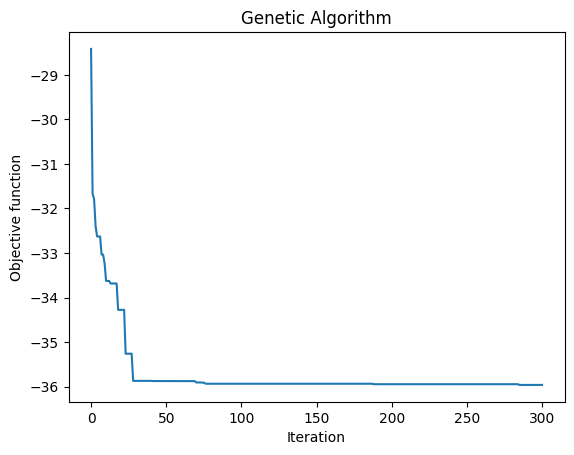

In [30]:
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    x, y = X
    return -(x**2-2*x*y+4*y**2-4*x-2*y+24)

model = ga(function=f, dimension=2, variable_type='real', variable_boundaries=np.array([[0,4], [0,2]]), progress_bar=False)

model.run()

The `output_dict` attribute provides the results of the optimization problem in a dictionary format.
- The value associated with the `"function"` key represents the minimum value of the negative of the function. Thus, the negative of this value is the maximum of the original function.
- The value associated with the `"variable"` key contains the $x$ and $y$ coordinates of the point where the minimum/maximum value is achieved.

In [32]:
model.output_dict

{'variable': array([1.09835801e-03, 1.99786809e+00]),
 'function': -35.96139052517142}

In [33]:
print(f'Maximum value: {-model.output_dict["function"]:.2f}')

Maximum value: 35.96


In [34]:
print(f'Maximum at x: {model.output_dict["variable"][0]:.2f},  y: {model.output_dict["variable"][1]:.2f}')

Maximum at x: 0.00,  y: 2.00
